In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
data = pd.read_excel("household_power_consumption.xlsx", parse_dates={'DateTime': ['Date', 'Time']})
data.head()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_15080\3295757247.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_excel("household_power_consumption.xlsx", parse_dates={'DateTime': ['Date', 'Time']})


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_Power,Laundry_Power,HVAC_Power
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [16]:
print(data.describe())


                            DateTime  Global_active_power  \
count                         499999        496066.000000   
mean   2007-06-08 08:03:00.000001024             1.104370   
min              2006-12-16 17:24:00             0.082000   
25%              2007-03-13 12:43:30             0.274000   
50%              2007-06-08 08:03:00             0.482000   
75%              2007-09-03 03:22:30             1.536000   
max              2007-11-28 22:42:00            10.670000   
std                              NaN             1.156942   

       Global_reactive_power        Voltage  Global_intensity  Kitchen_Power  \
count          496066.000000  496066.000000     496066.000000  496066.000000   
mean                0.118718     239.241471          4.718335       1.197194   
min                 0.000000     223.490000          0.400000       0.000000   
25%                 0.000000     236.810000          1.200000       0.000000   
50%                 0.100000     239.630000       

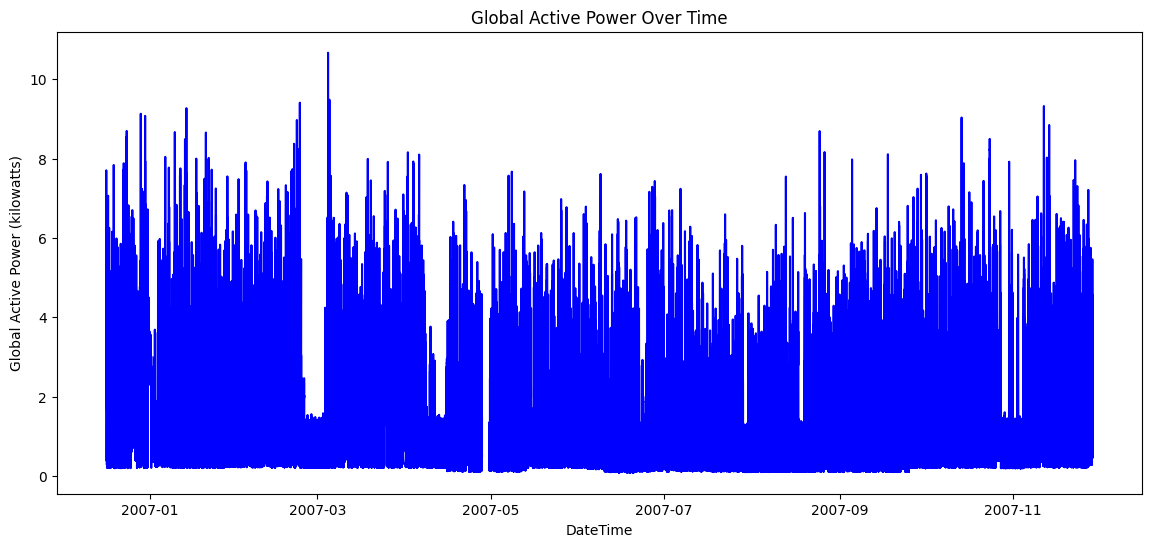

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(data['DateTime'], data['Global_active_power'], color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()


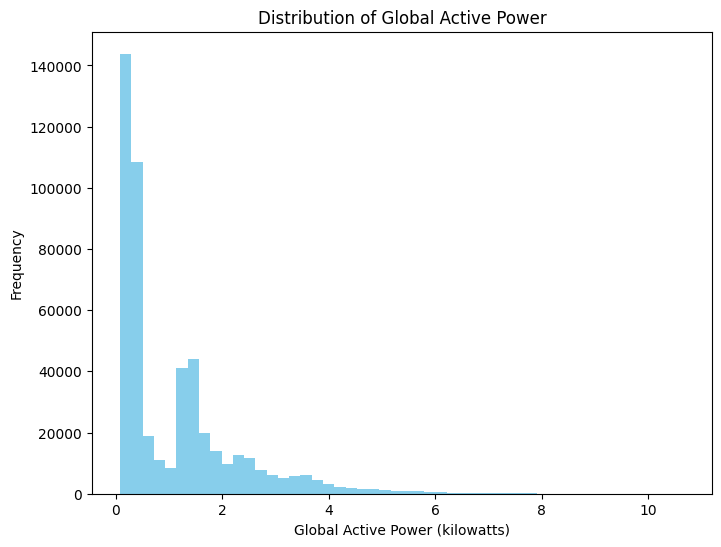

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(data['Global_active_power'], bins=50, color='skyblue')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()


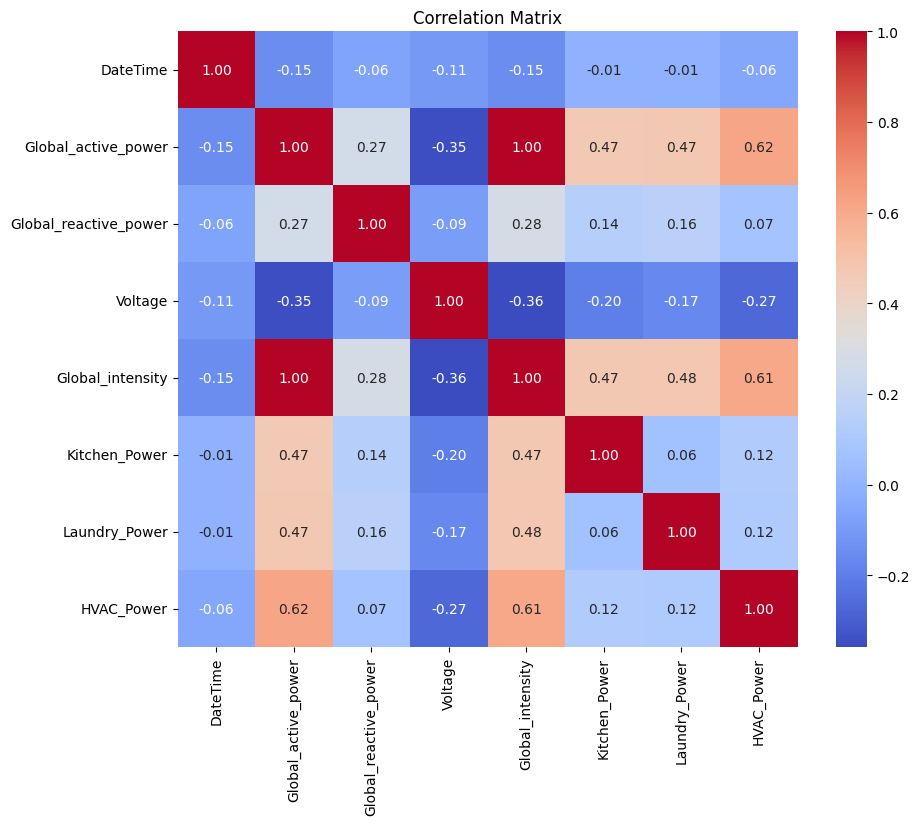

In [21]:
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [22]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 DateTime                    0
Global_active_power      3933
Global_reactive_power    3933
Voltage                  3933
Global_intensity         3933
Kitchen_Power            3933
Laundry_Power            3933
HVAC_Power               3933
dtype: int64


In [28]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Kitchen_Power', 'Laundry_Power', 'HVAC_Power']].apply(zscore)

# Set threshold for Z-score to flag outliers (e.g., ±3)
outliers = (z_scores.abs() > 3).any(axis=1)

# Display rows with outliers
print("Rows with outliers:\n", data[outliers])



Rows with outliers:
 Empty DataFrame
Columns: [DateTime, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Kitchen_Power, Laundry_Power, HVAC_Power]
Index: []


In [29]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Save the cleaned data to a new Excel file
data_cleaned.to_excel("household_power_consumption_cleaned.xlsx", index=False)


In [30]:
missing_values = data_cleaned.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 DateTime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Kitchen_Power            0
Laundry_Power            0
HVAC_Power               0
dtype: int64


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
X = data_cleaned[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Kitchen_Power', 'Laundry_Power', 'HVAC_Power']]
y = data_cleaned['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = rf_model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Random Forest:", mse)

Mean Squared Error for Random Forest: 3.5123614772107803e-06


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

# Feature importance (for Random Forest)
feature_importances = rf_model.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")

Root Mean Squared Error: 0.0018741295251958388
Mean Absolute Error: 1.4807789225192522e-05
Global_active_power: 0.9999876075142078
Global_reactive_power: 2.3688201360442327e-07
Voltage: 1.741642870752382e-08
Global_intensity: 1.206120300251426e-05
Kitchen_Power: 2.4232988312753213e-08
Laundry_Power: 4.186127943522524e-08
HVAC_Power: 1.089007959303897e-08


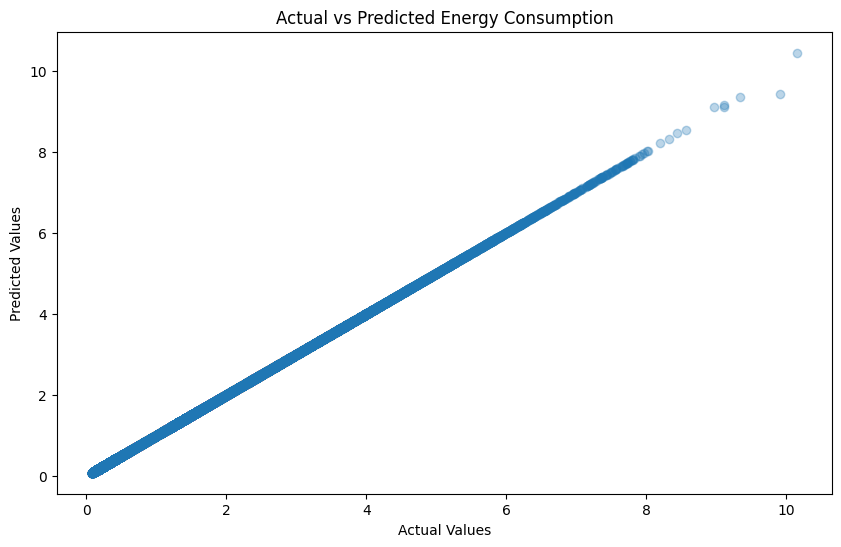

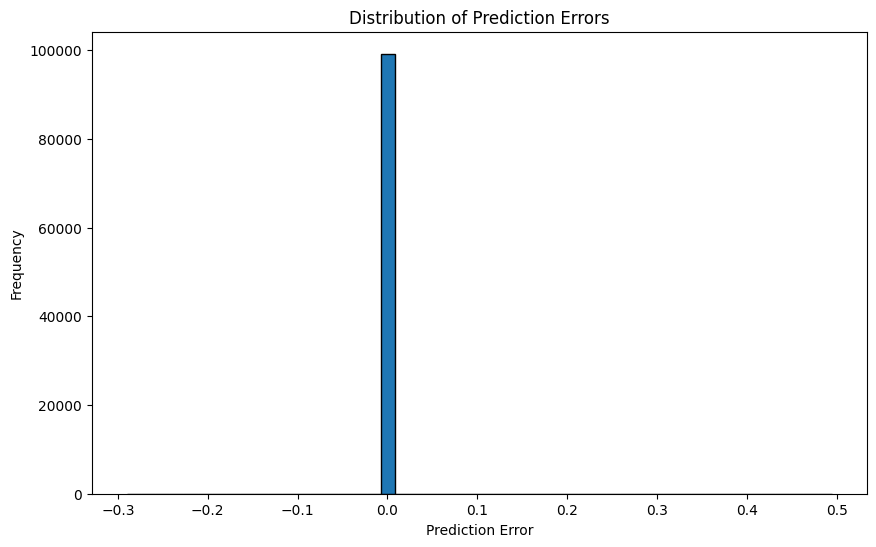

In [38]:
# Actual vs. predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()
